# Support Vector Machines
- Advantage of SVMs over logistic regression: They are computationally efficient with kernels.

In [28]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use("ggplot")
sns.set()

In [29]:
import matplotlib.image as mpimg
from PIL import Image


def show(path):
    img = mpimg.imread(path)
    sns.reset_orig()
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.imshow(img)
    sns.set()

# Hinge Loss
- The hinge loss is used for "maximum-margin" classification, most notably for support vector machines.
- Support vectors are defined as training examples that influence the decision boundary.
- Support vectors are the points lying close to boundary or incorrectly labeled data points.
- Removing non-support vectors will have no effect on decision boundary

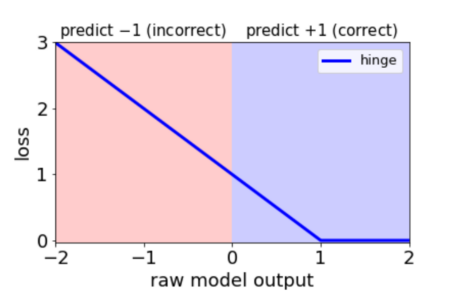

In [32]:
show(r'images/hinge_lossDiagram.png')

In [1]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values="NaN", strategy="most_frequent")

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [("imputation", imp), ("SVM", clf)]

In [4]:
# Setup the pipeline
steps = [("scaler", StandardScaler()), ("SVM", SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"SVM__C": [1, 10, 100], "SVM__gamma": [0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# lr = LogisticRegression()
# lr.fit(X_train,y_train)
# print(lr.score(X_train,y_train))
# print(lr.score(X_test,y_test))

# Apply SVM and print scores
# Default hyperparameter
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))
# Better results for test set.

0.9977728285077951
0.9888888888888889


# Linear SVM
- Linear SVM and logistic regression are linear classifiers
- Predict method is same for logistic regression and Linear SVM i.e., if positive predict one class else predict another
- Fit method is different for both

In [3]:
from sklearn.svm import SVC, LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9881217520415738
0.96


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
